# Analyzing the Conversion Rate of a Bank's Marketing Campaign
### EXPLORATORY ANALYSIS

Source - https://archive.ics.uci.edu/ml/datasets/bank+marketing

### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric) - Euro Interbank Offered Rate. The Euribor rates are based on the average interest rates at which a large panel of European banks borrow funds from one another
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Uncomment this line if using this notebook locally
#bank = pd.read_csv('bank-additional-full.csv', sep=';')

file_name = "https://raw.githubusercontent.com/Amateurdev-Ash/Analyzing-Conversion-Rates-of-Marketing-Campaigns---Data-Exploration/refs/heads/main/bank-additional-full.csv"
dataset = pd.read_csv(file_name, sep=';')

In [10]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
print ("Rows     : " , dataset.shape[0])
print ("Columns  : " , dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist())
print ("\nMissing values :  ", dataset.isnull().sum().values.sum())
print ("\nUnique values :  \n", dataset.nunique())

Rows     :  41188
Columns  :  21

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Missing values :   0

Unique values :  
 age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


#### Making our 'yes' and 'no' column for y (where 'y' indicates whether a customer was converted)
#### into a binary numeric datatype where '0' is 'no' and '1' is 'yes'(similar to LabelEncoding)

In [16]:
dataset['converted'] = dataset['y'].apply(lambda x:1  if x == 'yes' else 0)

In [18]:
# To delete our old y column since it's now been made redundant by the new column called 'converted'
#bank = bank.drop(['y'], axis = 1)

In [94]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,converted,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[55, 65)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[55, 65)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[35, 45)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[35, 45)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[55, 65)"


## Getting some base statistics to better understand how much customers converted

In [23]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,converted
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

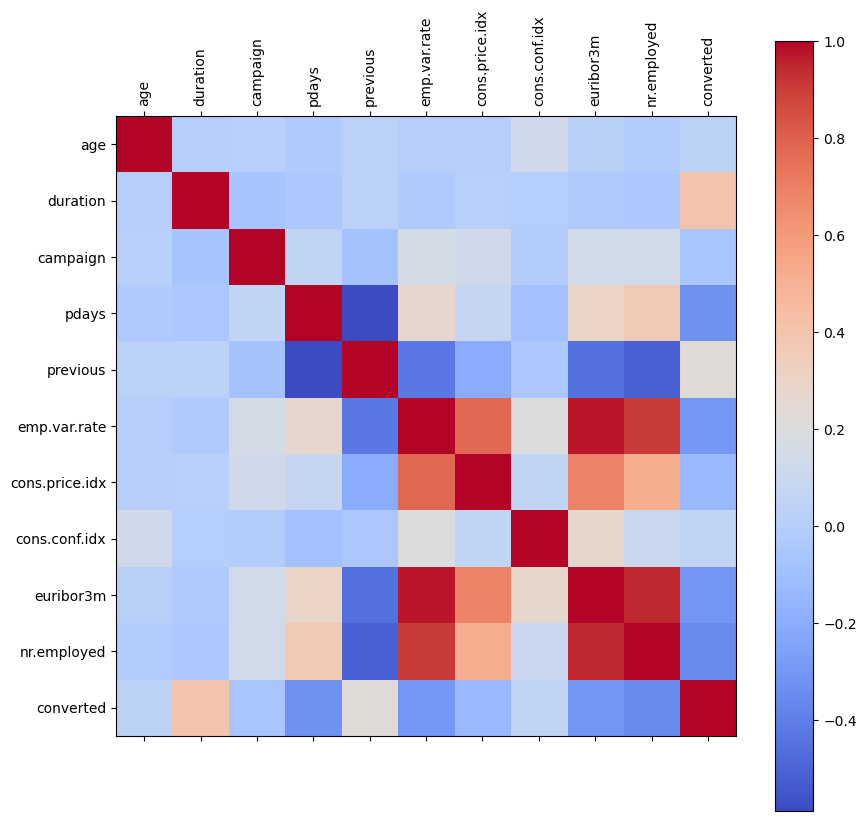

In [37]:
def plot_corr(df, size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    df_numeric = df.select_dtypes(include=['number'])
    corr = df_numeric.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='coolwarm') 
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90) 
    plt.yticks(range(len(corr.columns)), corr.columns)  
    
    plt.show()

plot_corr(dataset)

In [39]:
print('Total Converted: %i out of %i' % (dataset.converted.sum(), len(dataset)))

Total Converted: 4640 out of 41188


In [41]:
print('Our Conversion Rate: %0.2f%%' % (dataset.converted.sum() / len(dataset) * 100.0))

Our Conversion Rate: 11.27%


### Getting the sum of the number of conversions per campaign

In [44]:
pd.DataFrame(dataset.groupby(by='campaign')['converted'].sum())

,converted
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


### Getting the total number of customers targeted per campaign

In [49]:
pd.DataFrame(dataset.groupby(by='campaign')['converted'].count())

,converted
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


### Finding the conversion rate for each campaign

In [52]:
conv_by_camp = dataset.groupby('campaign')['converted'].sum() / dataset.groupby('campaign')['converted'].count() * 100.0
conv_by_camp.head(10)

campaign
1     13.037071
2     11.456954
3     10.747051
4      9.392682
5      7.504690
6      7.660878
7      6.041335
8      4.250000
9      6.007067
10     5.333333
Name: converted, dtype: float64

### Alternative method using aggregate and a lamda function

In [64]:
converted_sums_camp = dataset.groupby(['campaign', 'converted']).agg({'converted': 'count'})
conv_by_camp2 = converted_sums_camp.groupby(level=0).apply(lambda x: 100 * x / x.sum().iloc[0])
conv_by_camp2


converted
campaign campaign converted            
1        1        0           86.962929
                  1           13.037071
2        2        0           88.543046
                  1           11.456954
3        3        0           89.252949
                  1           10.747051
4        4        0           90.607318
                  1            9.392682
5        5        0           92.495310
                  1            7.504690
6        6        0           92.339122
                  1            7.660878
7        7        0           93.958665
                  1            6.041335
8        8        0           95.750000
                  1            4.250000
9        9        0           93.992933
                  1            6.007067
10       10       0           94.666667
                  1            5.333333
11       11       0           93.220339
                  1            6.779661
12       12       0           97.600000
                  1            2.400000
13       13       0           95.652174
                  1            4.347826
14       14       0           98.550725
                  1            1.449275
15       15       0           96.078431
                  1            3.921569
16       16       0          100.000000
17       17       0           93.103448
                  1            6.896552
18       18       0          100.000000
19       19       0          100.000000
20       20       0          100.000000
21       21       0          100.000000
22       22       0          100.000000
23       23       0           93.750000
                  1            6.250000
24       24       0          100.000000
25       25       0          100.000000
26       26       0          100.000000
27       27       0          100.000000
28       28       0          100.000000
29       29       0          100.000000
30       30       0          100.000000
31       31       0          100.000000
32       32       0          100.000000
33       33       0          100.000000
34       34       0          100.000000
35       35       0          100.000000
37       37       0          100.000000
39       39       0          100.000000
40       40       0          100.000000
41       41       0          100.000000
42       42       0          100.000000
43       43       0          100.000000
56       56       0          100.000000

### Conversion Rates by Age

In [66]:
converted_sums_age = dataset.groupby(['age', 'converted']).agg({'converted': 'count'})
conv_by_age = converted_sums_age.groupby(level=0).apply(lambda x: 100 * x / x.sum().iloc[0])
conv_by_age

converted
age age converted            
17  17  0           60.000000
        1           40.000000
18  18  0           57.142857
        1           42.857143
19  19  0           52.380952
...                       ...
92  92  0           25.000000
        1           75.000000
94  94  0          100.000000
95  95  0          100.000000
98  98  1          100.000000

[150 rows x 1 columns]

In [72]:
# Isolate it to percentages for more efficient viewing
conv_by_age = dataset.groupby('age')['converted'].sum() / dataset.groupby('age')['converted'].count() * 100.0

In [74]:
#conv_by_age = pd.DataFrame(conv_by_age)
conv_by_age = pd.DataFrame(conv_by_age).reset_index()
conv_by_age

,age,converted
0,17,40.000000
1,18,42.857143
2,19,47.619048
3,20,35.384615
4,21,28.431373
...,...,...
73,91,0.000000
74,92,75.000000
75,94,0.000000
76,95,0.000000


In [76]:
conv_by_age.sort_values('converted', ascending=False)

,age,converted
77,98,100.000000
72,89,100.000000
70,87,100.000000
74,92,75.000000
60,77,65.000000
...,...,...
32,49,6.555423
30,47,6.250000
73,91,0.000000
75,94,0.000000


In [78]:
conv_by_age = conv_by_age.set_index('age')
conv_by_age

,converted
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
...,...
91,0.000000
92,75.000000
94,0.000000


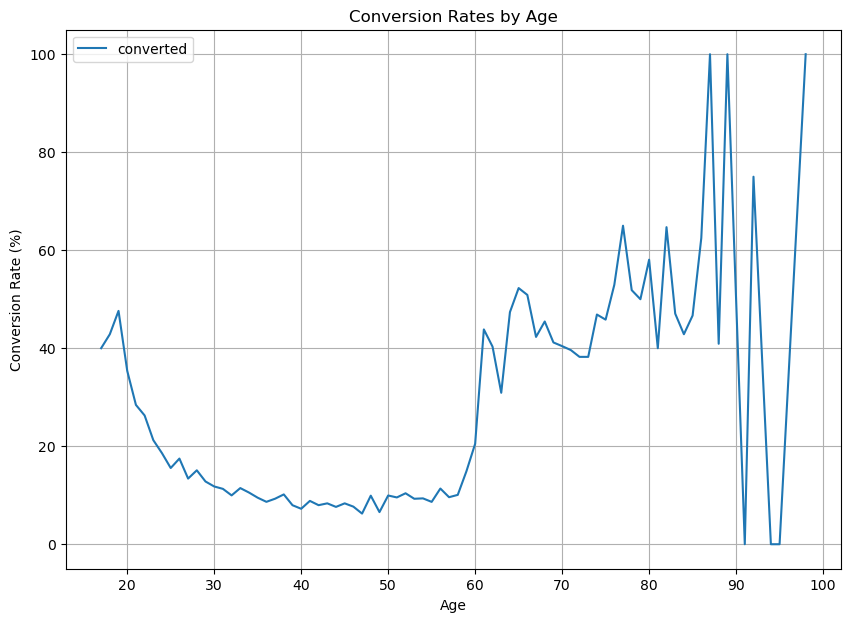

In [80]:
ax = conv_by_age.plot(grid=True, figsize=(10, 7), title='Conversion Rates by Age')

ax.set_xlabel('Age')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

## Creating age groups for better interpretation of age

In [92]:
dataset['age_group'] = dataset['age'].apply(lambda x: '[17, 25)' if x < 25 else '[25, 35)' 
                                  if x < 35 else '[35, 45)'
                                  if x < 45 else '[45, 55)' 
                                  if x < 55 else '[55, 65)'
                                  if x < 65 else '65+')
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,converted,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[55, 65)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[55, 65)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[35, 45)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[35, 45)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[55, 65)"


### Grouping by age group now, let's sum the number of coversions (i.e. the 1s)

In [96]:
pd.DataFrame(dataset.groupby('age_group')['converted'].sum())

,converted
age_group,
65+,313
"[17, 25)",256
"[25, 35)",1666
"[35, 45)",1168
"[45, 55)",753
"[55, 65)",484


### Grouping by age group now, let's count the number of coversions

In [99]:
pd.DataFrame(dataset.groupby('age_group')['converted'].count())

,converted
age_group,
65+,663
"[17, 25)",1068
"[25, 35)",13686
"[35, 45)",13500
"[45, 55)",8704
"[55, 65)",3567


### Let's combine the above to get the ratio or percent converted

In [102]:
conv_by_age_group = dataset.groupby('age_group')['converted'].sum() / dataset.groupby('age_group')['converted'].count() * 100.0

In [105]:
#conv_by_age_group = pd.DataFrame(conv_by_age_group).reset_index()
conv_by_age_group.head()

age_group
65+         47.209653
[17, 25)    23.970037
[25, 35)    12.173024
[35, 45)     8.651852
[45, 55)     8.651195
Name: converted, dtype: float64

### Now let us plot the age groups vs conversion rate

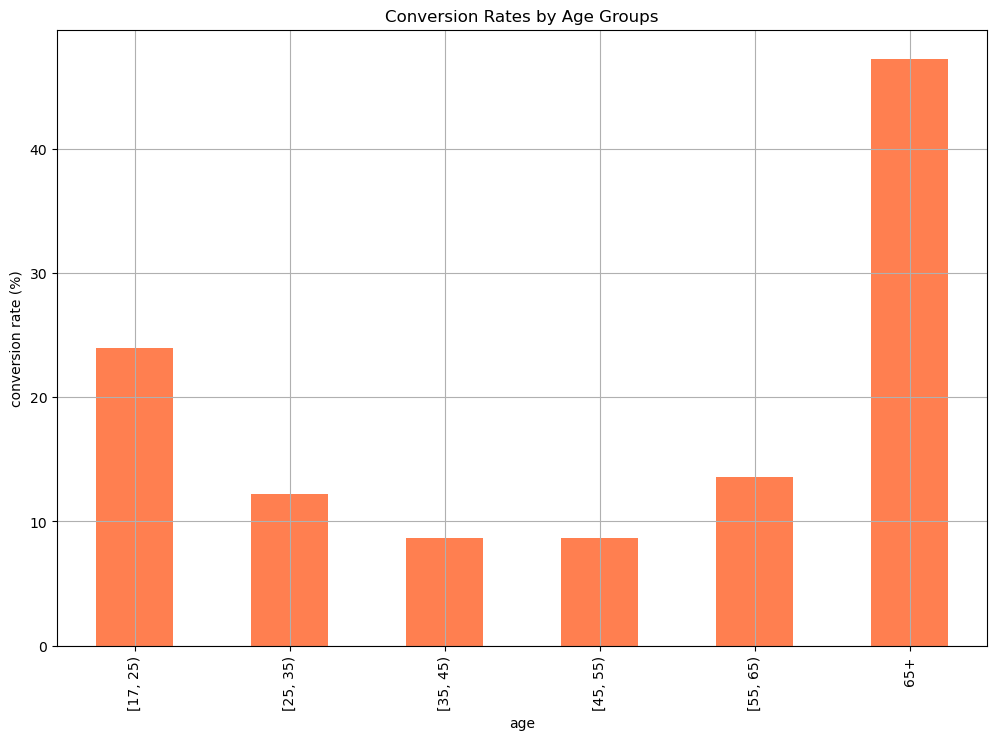

In [108]:
ax = conv_by_age_group.loc[['[17, 25)', '[25, 35)', '[35, 45)', '[45, 55)', '[55, 65)', '65+']].plot(
    kind='bar',
    color='coral',
    grid=True,
    figsize=(12, 8),
    title='Conversion Rates by Age Groups')

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

### Let's do the same for education

In [113]:
conversions_by_education = pd.pivot_table(dataset, values='y', index='education', columns='converted', aggfunc=len)
conversions_by_education

converted,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [115]:
# Renaming those columns
conversions_by_education.columns = ['non_conversions', 'conversions']
conversions_by_education

,non_conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


### Ploting those on a piechart

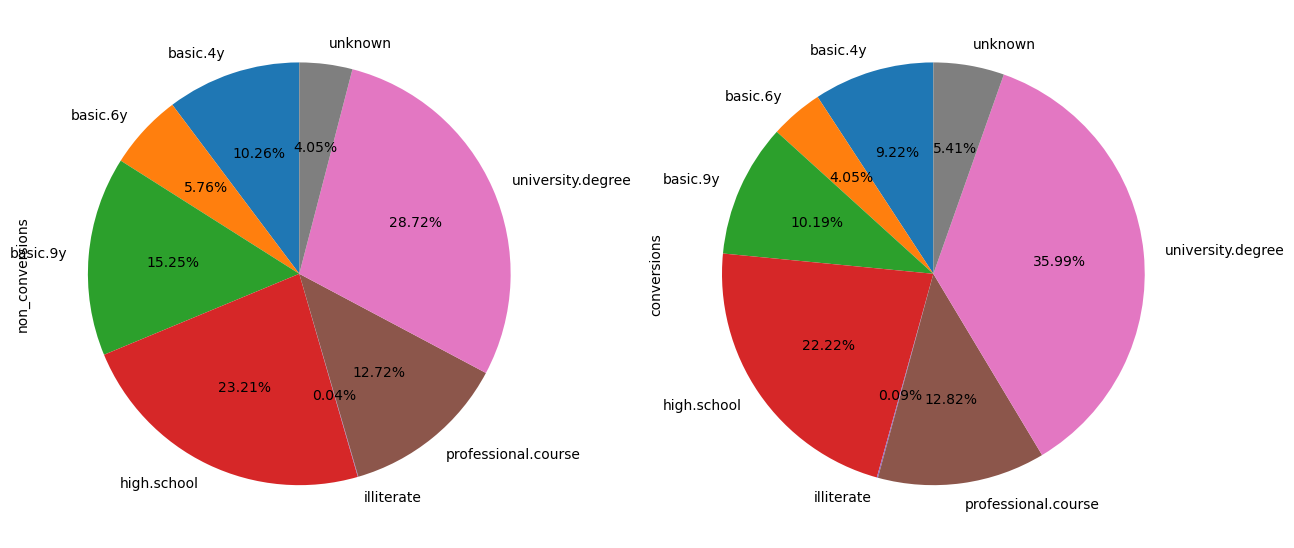

In [120]:
conversions_by_education.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.2f%%' % x,
    legend=False
)

plt.show()

In [122]:
# Printing the column names so we can use them as labels in our next chart
list(conversions_by_education.reset_index()['education'])

['basic.4y',
 'basic.6y',
 'basic.9y',
 'high.school',
 'illiterate',
 'professional.course',
 'university.degree',
 'unknown']

In [124]:
# Let's flatten our multi-index dataframe so we can plot it - Option 2 to do above
#conversions_by_education = conversions_by_education.reset_index()

In [126]:
new_order = [1,0]
conversions_by_education = conversions_by_education[conversions_by_education.columns[new_order]]
conversions_by_education

,conversions,non_conversions
education,,
basic.4y,428,3748
basic.6y,188,2104
basic.9y,473,5572
high.school,1031,8484
illiterate,4,14
professional.course,595,4648
university.degree,1670,10498
unknown,251,1480


### Let's plot a stacked bargraph

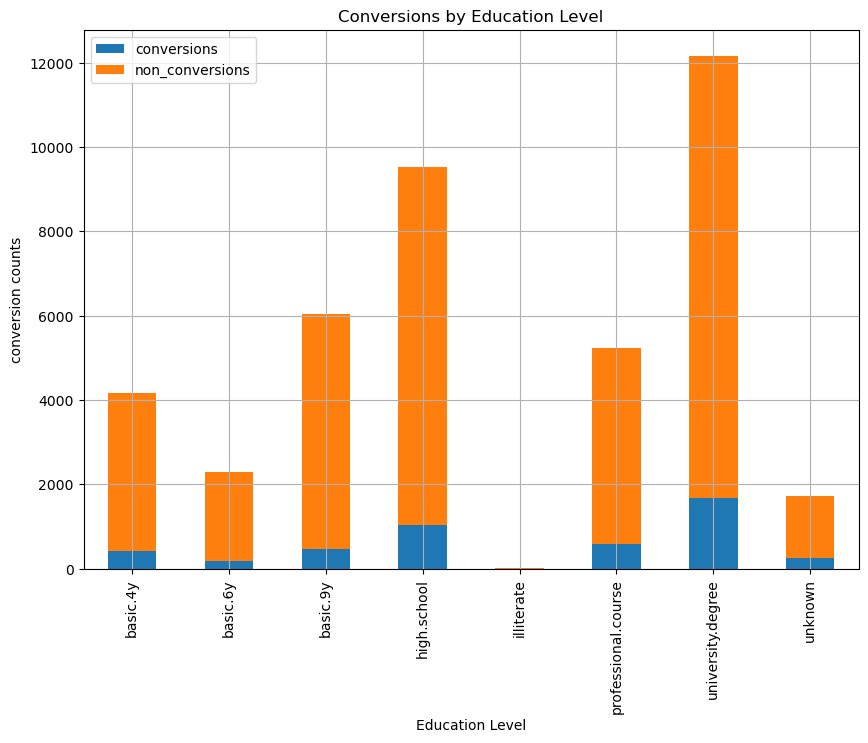

In [129]:
ax = conversions_by_education.loc[['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course',
 'university.degree','unknown']].plot(
    kind='bar', 
    grid=True,
    stacked=True,
    figsize=(10,7))

ax.set_title('Conversions by Education Level')
ax.set_xlabel('Education Level')
ax.set_ylabel('conversion counts')

plt.show()

In [133]:
conversions_by_education.loc[:, 'per_converted'] = conversions_by_education['conversions'] / conversions_by_education['non_conversions']
conversions_by_education

,conversions,non_conversions,per_converted
education,,,
basic.4y,428,3748,0.114194
basic.6y,188,2104,0.089354
basic.9y,473,5572,0.084889
high.school,1031,8484,0.121523
illiterate,4,14,0.285714
professional.course,595,4648,0.128012
university.degree,1670,10498,0.159078
unknown,251,1480,0.169595


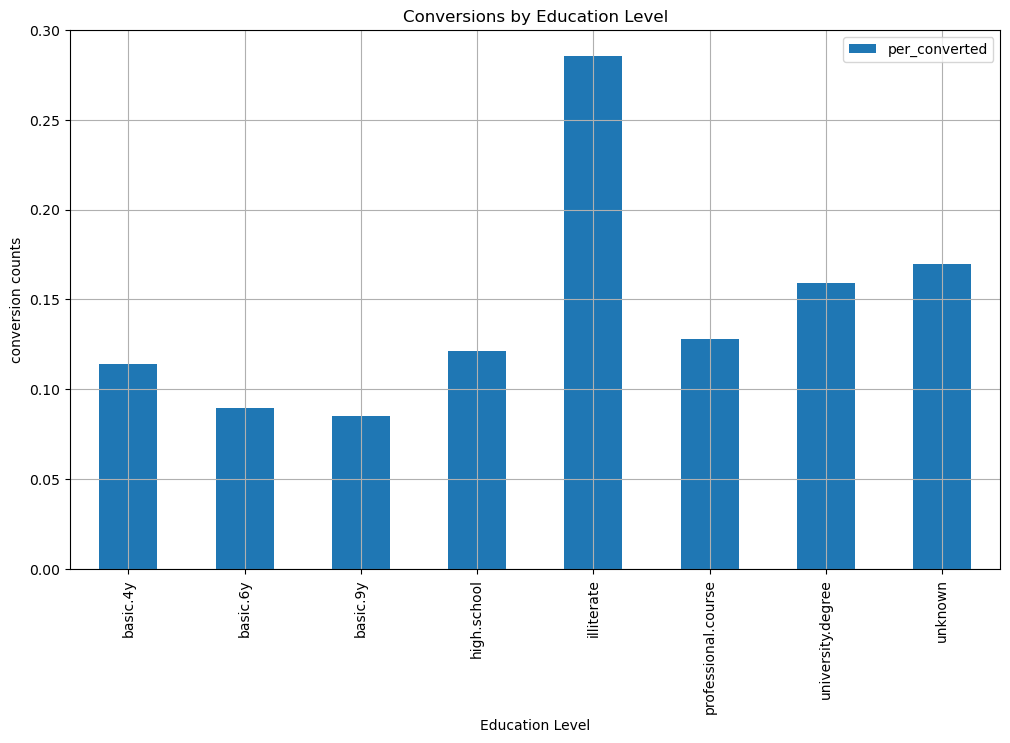

In [135]:
ax = conversions_by_education.loc[['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course',
 'university.degree','unknown']].plot(
    y = 'per_converted',
    kind='bar', 
    grid=True,
    stacked=True,
    figsize=(12,7))

ax.set_title('Conversions by Education Level')
ax.set_xlabel('Education Level')
ax.set_ylabel('conversion counts')

plt.show()

### Let's explore Conversion Rate by Job

In [138]:
conv_rate_by_job = dataset.groupby('job')['converted'].sum() / dataset.groupby('job')['converted'].count() * 100.0
conv_rate_by_job

job
admin.           12.972558
blue-collar       6.894316
entrepreneur      8.516484
housemaid        10.000000
management       11.217510
retired          25.232558
self-employed    10.485574
services          8.138070
student          31.428571
technician       10.826042
unemployed       14.201183
unknown          11.212121
Name: converted, dtype: float64

In [140]:
# Sorting it for a better aesthetic when plotted
conv_rate_by_job = conv_rate_by_job.sort_values()
conv_rate_by_job

job
blue-collar       6.894316
services          8.138070
entrepreneur      8.516484
housemaid        10.000000
self-employed    10.485574
technician       10.826042
unknown          11.212121
management       11.217510
admin.           12.972558
unemployed       14.201183
retired          25.232558
student          31.428571
Name: converted, dtype: float64

### Generating a Horizontal Bar Graph

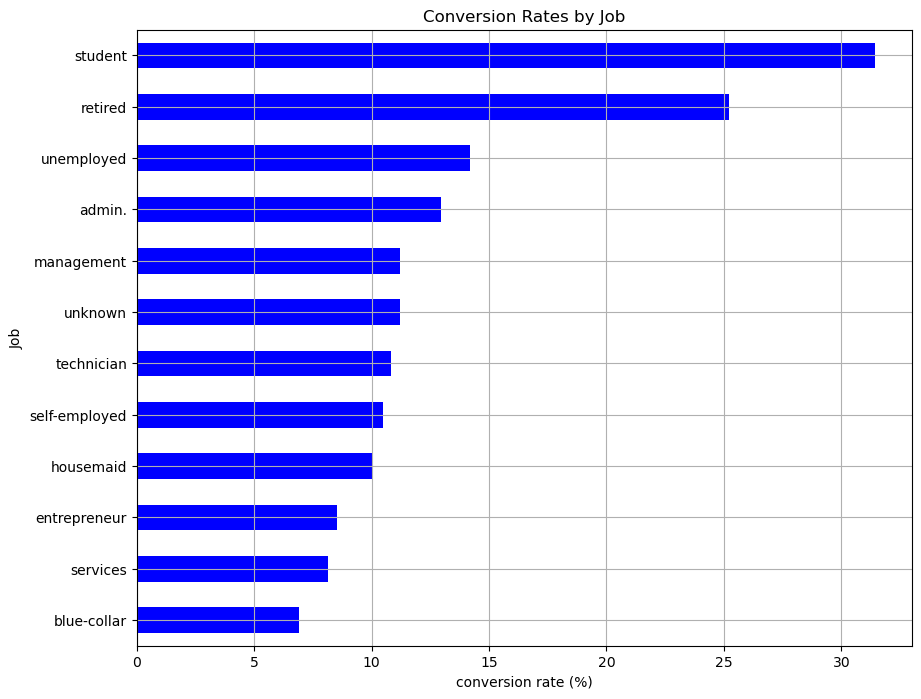

In [151]:
ax = conv_rate_by_job.plot(
    kind='barh',
    color='blue',
    grid=True,
    figsize=(10, 8),
    title='Conversion Rates by Job')

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')

plt.show()

### Let's explore Conversion Rate By Marital Status

In [146]:
conv_rate_by_ms = dataset.groupby('marital')['converted'].sum() / dataset.groupby('marital')['converted'].count() * 100.0
conv_rate_by_ms = conv_rate_by_ms.sort_values()
conv_rate_by_ms

marital
married     10.157253
divorced    10.320902
single      14.004149
unknown     15.000000
Name: converted, dtype: float64

### Let's generate a simple bar plot

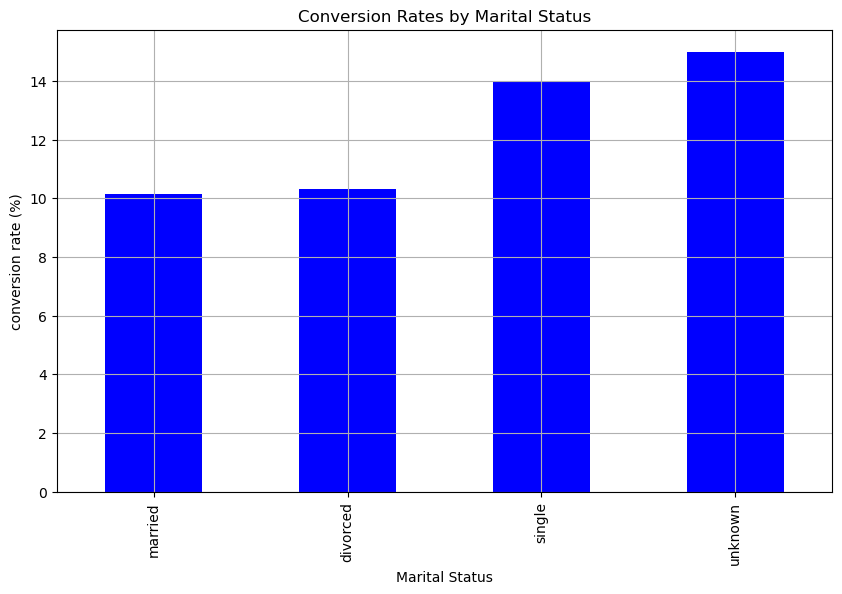

In [149]:
ax = conv_rate_by_ms.plot(
    kind='bar',
    color='blue',
    grid=True,
    figsize=(10, 6),
    title='Conversion Rates by Marital Status')

ax.set_xlabel('Marital Status')
ax.set_ylabel('conversion rate (%)')

plt.show()